<a href="https://colab.research.google.com/github/gaditi123/Technical-Indicators-FA-Project/blob/main/Weighted_combinations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 11.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 5.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=8134b38a16d3e010d6c59867ea4462eb3510169aad9f0528215cda386f705b27
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta

plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = [14, 8]

[*********************100%***********************]  1 of 1 completed


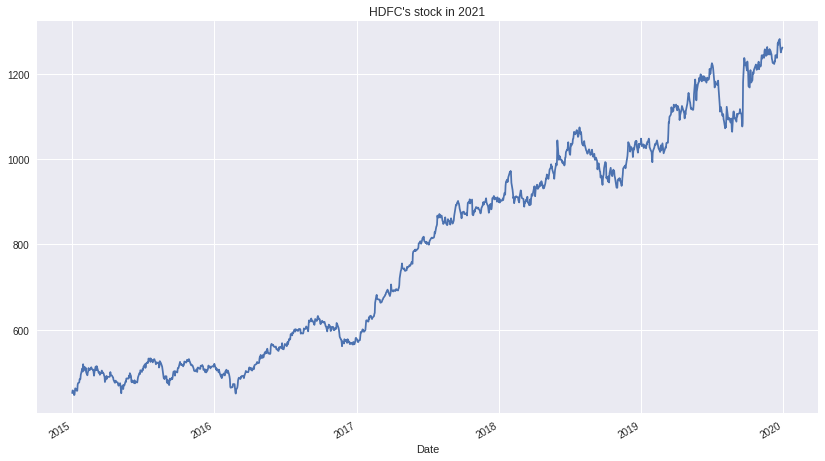

In [ ]:
df = yf.download("HDFCBANK.NS", start="2015-01-01", end="2019-12-31")
df["Adj Close"].plot(title="HDFC's stock in 2021");

In [ ]:
CustomStrategy = ta.Strategy(
    name="Weighted Strategy",
    description="SMA 50,200, BBANDS, RSI, MACD and Volume SMA 20",
    ta = [
          {"kind" : "sma", "length" : 10},
          {"kind": "sma", "length": 30},
          {"kind": "rsi"},
          {"kind" : "obv"},
          {"kind": "macd", "fast": 8, "slow": 21},
          {"kind": "bbands", "length": 20}
    ]
)
# To run your "Custom Strategy"
df.ta.strategy(CustomStrategy)

In [ ]:
df['OBV_EMA'] = df['OBV'].ewm(span=14).mean()
df = df.iloc[30:, :]
df.head(200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,RSI_14,OBV,...,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,OBV_EMA,Signals_SMA,Signals_RSI,Signals_OBV,Buy_Sell_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-31,519.950012,519.950012,507.424988,511.350006,484.978485,2981128,518.640002,527.315007,42.777334,22766994.0,...,505.203787,524.535004,543.866220,7.370801,0.158971,3.345554e+07,0,0,0,0
2015-04-01,513.049988,518.424988,506.500000,516.625000,489.981415,1922098,517.125000,526.743339,46.549342,24689092.0,...,505.361044,523.282504,541.203965,6.849631,0.314259,3.227456e+07,0,0,0,0
2015-04-06,517.500000,518.424988,509.899994,515.974976,489.364960,3575586,516.112500,526.029171,46.145670,21113506.0,...,504.798594,522.448752,540.098910,6.756704,0.316609,3.077306e+07,0,0,0,0
2015-04-07,516.625000,519.099976,511.825012,516.375000,489.744324,3098536,514.954999,525.245003,46.453413,24212042.0,...,505.933328,521.140002,536.346677,5.835927,0.343325,2.989146e+07,0,0,0,0
2015-04-08,520.025024,521.224976,515.025024,517.775024,491.072174,2053072,514.345001,524.620003,47.582372,26265114.0,...,505.783686,520.553754,535.323821,5.674752,0.405934,2.940470e+07,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-14,525.075012,528.700012,519.750000,524.875000,501.547607,3139592,531.137494,532.677496,42.410586,-6940536.0,...,523.761230,534.439996,545.118763,3.996245,0.052149,-5.044430e+06,0,0,-1,0
2016-01-15,524.000000,527.724976,519.049988,521.075012,497.916534,2708630,528.807495,532.100830,39.499564,-9649166.0,...,521.669386,533.487497,545.305608,4.430511,-0.025147,-5.658395e+06,0,0,0,0
2016-01-18,517.825012,520.724976,510.500000,512.924988,490.128723,3247694,526.574994,531.549996,34.094328,-12896860.0,...,517.582638,532.308746,547.034854,5.532920,-0.158143,-6.623524e+06,0,0,0,0


In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_10',
       'SMA_30', 'RSI_14', 'OBV', 'MACD_8_21_9', 'MACDh_8_21_9',
       'MACDs_8_21_9', 'BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0', 'BBB_20_2.0',
       'BBP_20_2.0', 'OBV_EMA', 'Signals_SMA', 'Signals_RSI', 'Signals_OBV',
       'Buy_Sell_Signal', 'Signals_MACD', 'Signals_BB'],
      dtype='object')

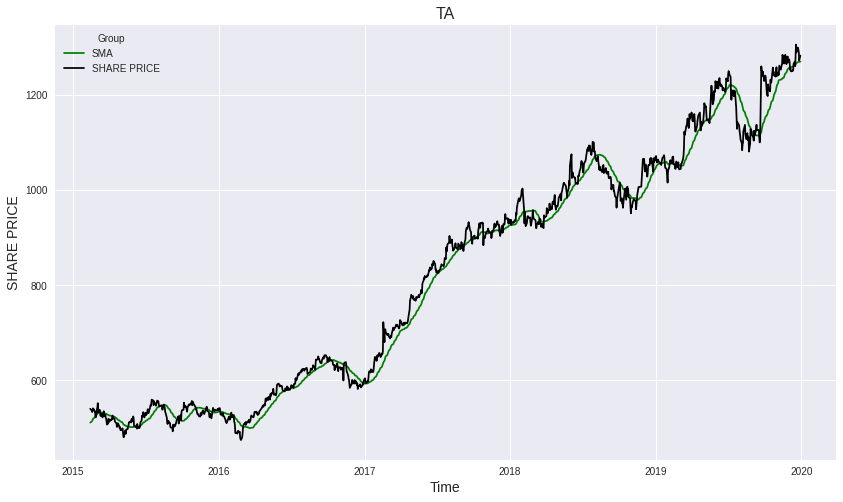

In [97]:
plt.plot(df['SMA_30'], label='SMA', color='green')
plt.plot(df['Open'], label='SHARE PRICE', color='black')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('SHARE PRICE', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('TA', fontsize=16)

#display plot
plt.show()

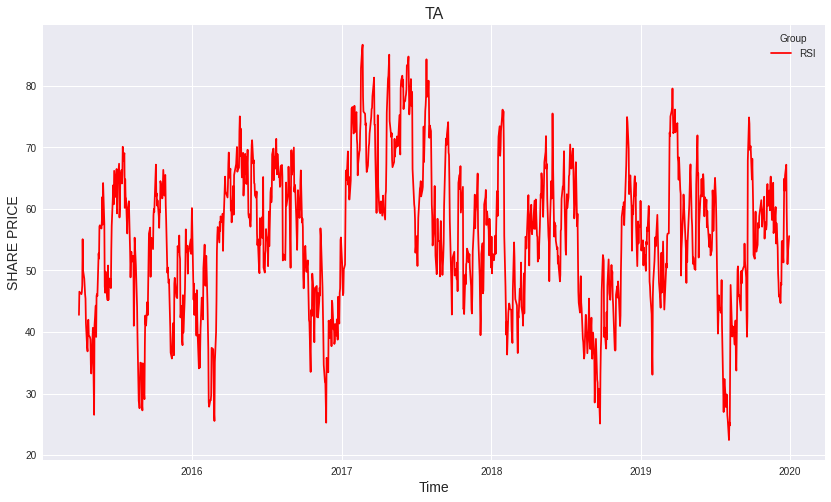

In [ ]:
plt.plot(df['RSI_14'], label='RSI', color='red')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('RSI range', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('RSI', fontsize=16)

#display plot
plt.show()

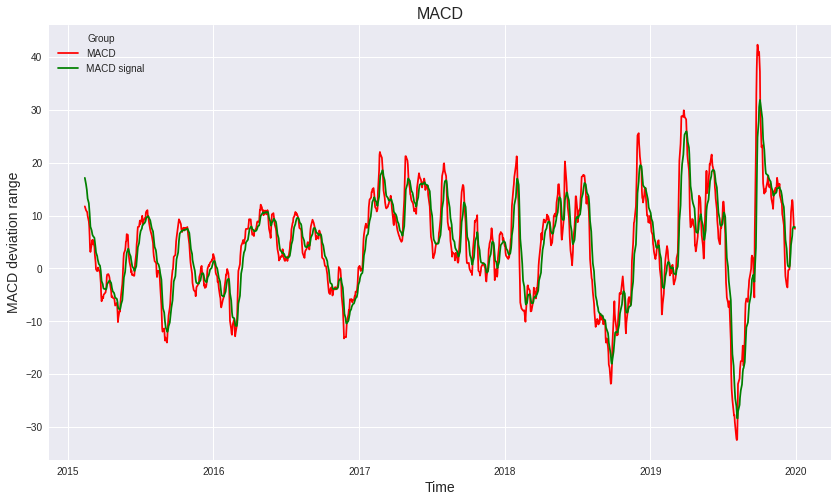

In [94]:
plt.plot(df['MACD_8_21_9'], label ='MACD', color ='red')
plt.plot(df['MACDs_8_21_9'], label = 'MACD signal', color = 'green')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('MACD deviation range', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('MACD', fontsize=16)

#display plot
plt.show()

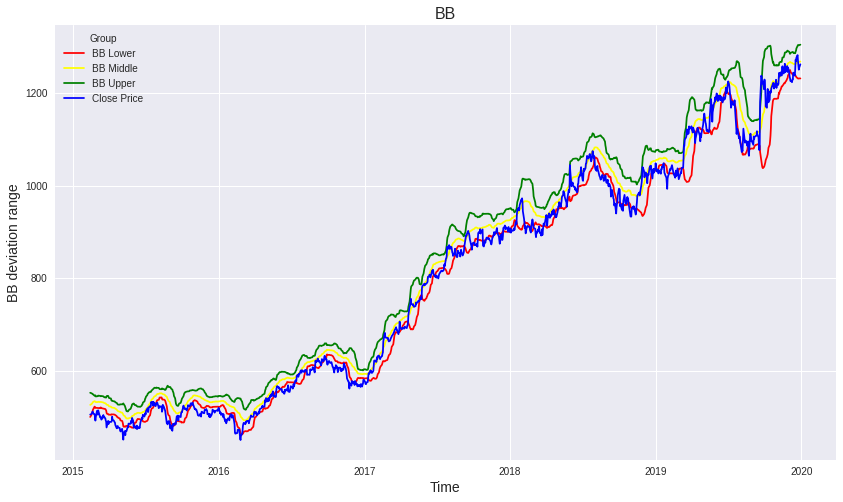

In [96]:
plt.plot(df['BBL_20_2.0'], label ='BB Lower', color ='red')
plt.plot(df['BBM_20_2.0'], label = 'BB Middle', color = 'yellow')
plt.plot(df['BBU_20_2.0'], label = 'BB Upper', color = 'green')
plt.plot(df['Adj Close'], label = 'Close Price', color ='blue')

#add legend
plt.legend(title='Group')

#add axes labels and a title
plt.ylabel('BB deviation range', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.title('BB', fontsize=16)

#display plot
plt.show()

In [110]:
weights = {
  'SMA' : 0.25,
  'RSI' : 0.5,  
  'OBV' : 0.35,
  'MACD' : 0.3,
  'BB' : 0.25
}

In [111]:
df['Signals_SMA'] = 0

def calculateSignalsForSMA(alreadyBrought,alreadySold):
  for i in range(len(df)) :
    if df['SMA_10'][i] > df['SMA_30'][i] and alreadyBrought == False:
      df['Signals_SMA'][i] = 1
      alreadyBrought = True
      alreadySold = False

    elif  df['SMA_10'][i] < df['SMA_30'][i] and alreadySold == False:
      df['Signals_SMA'][i] = -1
      alreadySold = True
      alreadyBrought = False
      print("SellingSMA")

    else:
      df['Signals_SMA'][i] = 0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
df['Signals_RSI'] = 0
def calculateSignalsForRSI(alreadyBought, alreadySold):
  for i in range(len(df)) :
    if df['RSI_14'][i] < 25 and alreadyBought == False:
      df['Signals_RSI'][i] = 1
      alreadyBought = True
      alreadySold = False

    elif df['RSI_14'][i] > 70 and alreadySold == False:
      df['Signals_RSI'][i] = -1
      alreadyBought = False
      alreadySold = True
      print("SellignRSI")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [113]:
df['Signals_OBV'] = 0

def calculateSignalsForOBV(alreadyBought,alreadySold):
  for i in range(len(df)) :
    if df['OBV'][i] > df['OBV_EMA'][i] and alreadyBought == False:
      df['Signals_OBV'][i] = 1
      alreadyBought = True
      alreadySold = False

    elif df['OBV'][i] < df['OBV_EMA'][i] and alreadySold == False:
      df['Signals_OBV'][i] = -1
      alreadySold = True
      alreadyBought = False
      print("SellingOBV")

    else :
      df['Signals_OBV'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [114]:
df['Signals_MACD'] = 0

def calculateSignalsForMACD(alreadyBought,alreadySold):
  for i in range(len(df)) :
    if df['MACD_8_21_9'][i] > df['MACDs_8_21_9'][i] and alreadyBought == False:
      df['Signals_MACD'][i] = 1
      alreadyBought = True
      alreadySold = False

    elif df['MACD_8_21_9'][i] < df['MACDs_8_21_9'][i] and alreadySold == False:
      df['Signals_MACD'][i] = -1
      alreadySold = True
      alreadyBought = False
      print("SellingMACD")

    else :
      df['Signals_MACD'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [115]:
df['Signals_BB'] = 0

def calculateSignalsForBB(alreadyBought,alreadySold):
  for i in range(len(df)) :
    if df['BBL_20_2.0'][i] > df['Adj Close'][i] and alreadyBought == False:
      df['Signals_BB'][i] = 1
      alreadyBought = True
      alreadySold = False

    elif df['BBU_20_2.0'][i] < df['Adj Close'][i] and alreadySold == False:
      df['Signals_BB'][i] = -1
      alreadySold = True
      alreadyBought = False
      print("SellingBB")

    else :
      df['Signals_BB'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [116]:
calculateSignalsForSMA(False, True)
calculateSignalsForRSI(False, True)
calculateSignalsForOBV(False, True)
calculateSignalsForMACD(False, True)
calculateSignalsForBB(False, True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellingSMA
SellignRSI
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.



SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingOBV
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
SellingMACD
S

In [117]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,RSI_14,OBV,...,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,OBV_EMA,Signals_SMA,Signals_RSI,Signals_OBV,Signals_MACD,Signals_BB,Buy_Sell_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-13,540.599976,541.000000,531.799988,532.900024,505.417145,3857250,531.907495,511.523333,59.815652,36787422.0,...,552.491119,9.935473,0.625372,3.319909e+07,1,0,1,0,0,0
2015-02-16,537.900024,542.500000,531.250000,533.775024,506.246979,3694358,531.204999,513.227500,60.270091,40481780.0,...,551.493358,8.899494,0.622928,3.418018e+07,0,0,0,0,0,0
2015-02-18,533.775024,541.474976,528.525024,537.400024,509.685028,2690846,531.740002,515.188334,62.178376,43172626.0,...,550.370369,7.782982,0.685420,3.538994e+07,0,0,0,0,0,0
2015-02-19,537.000000,542.450012,531.900024,539.900024,512.056152,2253502,532.345007,517.480835,63.481122,45426128.0,...,550.267673,7.168855,0.727761,3.673849e+07,0,0,0,0,1,0
2015-02-20,541.500000,544.950012,534.250000,536.525024,508.855133,3103012,532.172510,519.615002,60.453780,42323116.0,...,549.010332,6.180250,0.620659,3.748812e+07,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1299.000000,1304.000000,1288.800049,1302.400024,1281.883057,5097891,1273.439990,1267.870003,67.172380,436711588.0,...,1301.791263,5.528411,1.008693,4.221179e+08,0,0,0,0,0,0
2019-12-24,1298.599976,1301.099976,1286.949951,1289.150024,1268.841797,3589604,1277.404993,1268.683337,59.681157,433121984.0,...,1303.681982,5.712435,0.799293,4.235852e+08,0,0,0,0,0,0
2019-12-26,1289.699951,1291.849976,1264.650024,1270.449951,1250.436279,7474879,1279.574988,1269.113334,51.031270,425647105.0,...,1302.969349,5.664486,0.546918,4.238601e+08,0,0,0,0,0,0


In [118]:
sellTotal = 0
buyTotal = 0
df['Buy_Sell_Signal'] = 0


for i in range(len(df)):
  sellTotal = 0
  buyTotal = 0
  if(df['Signals_SMA'][i] == 1):
    buyTotal = buyTotal + 1*weights['SMA']
  if(df['Signals_SMA'][i] == -1):
    sellTotal = sellTotal +1*weights['SMA']
  if(df['Signals_RSI'][i] == 1):
    buyTotal = buyTotal + 1*weights['RSI']
  if(df['Signals_RSI'][i] == -1):
    sellTotal = sellTotal +1*weights['RSI']
  if(df['Signals_OBV'][i] == 1):
    buyTotal = buyTotal + 1*weights['OBV']
  if(df['Signals_OBV'][i] == -1):
    sellTotal = sellTotal +1*weights['OBV']
  if df['Signals_MACD'][i] == 1:
    buyTotal = buyTotal + 1*weights['MACD']
  if df['Signals_MACD'][i] == -1:
    sellTotal = sellTotal + 1*weights['MACD']
  

  if buyTotal == 0.5 : 
    df['Buy_Sell_Signal'][i] = 1
    print("Buy")
  elif sellTotal == 0.5:
    df['Buy_Sell_Signal'][i] = -1
    print("Sell")

Buy
Sell


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

In [119]:
df

,Open,High,Low,Close,Adj Close,Volume,SMA_10,SMA_30,RSI_14,OBV,...,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,OBV_EMA,Signals_SMA,Signals_RSI,Signals_OBV,Signals_MACD,Signals_BB,Buy_Sell_Signal
Date,,,,,,,,,,,,,,,,,,,,,
2015-02-13,540.599976,541.000000,531.799988,532.900024,505.417145,3857250,531.907495,511.523333,59.815652,36787422.0,...,552.491119,9.935473,0.625372,3.319909e+07,1,0,1,0,0,0
2015-02-16,537.900024,542.500000,531.250000,533.775024,506.246979,3694358,531.204999,513.227500,60.270091,40481780.0,...,551.493358,8.899494,0.622928,3.418018e+07,0,0,0,0,0,0
2015-02-18,533.775024,541.474976,528.525024,537.400024,509.685028,2690846,531.740002,515.188334,62.178376,43172626.0,...,550.370369,7.782982,0.685420,3.538994e+07,0,0,0,0,0,0
2015-02-19,537.000000,542.450012,531.900024,539.900024,512.056152,2253502,532.345007,517.480835,63.481122,45426128.0,...,550.267673,7.168855,0.727761,3.673849e+07,0,0,0,0,1,0
2015-02-20,541.500000,544.950012,534.250000,536.525024,508.855133,3103012,532.172510,519.615002,60.453780,42323116.0,...,549.010332,6.180250,0.620659,3.748812e+07,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23,1299.000000,1304.000000,1288.800049,1302.400024,1281.883057,5097891,1273.439990,1267.870003,67.172380,436711588.0,...,1301.791263,5.528411,1.008693,4.221179e+08,0,0,0,0,0,0
2019-12-24,1298.599976,1301.099976,1286.949951,1289.150024,1268.841797,3589604,1277.404993,1268.683337,59.681157,433121984.0,...,1303.681982,5.712435,0.799293,4.235852e+08,0,0,0,0,0,0
2019-12-26,1289.699951,1291.849976,1264.650024,1270.449951,1250.436279,7474879,1279.574988,1269.113334,51.031270,425647105.0,...,1302.969349,5.664486,0.546918,4.238601e+08,0,0,0,0,0,0


In [120]:
import math

In [121]:
initial_capital = 10000
current_capital = 10000
shares = 0

for i in range(len(df)):
  if(df['Buy_Sell_Signal'][i] == 1 and current_capital >= df['Adj Close'][i]):
    current_capital = current_capital - math.floor(current_capital/df['Adj Close'][i]) * df['Adj Close'][i]
    shares = math.floor(current_capital/df['Adj Close'][i])
  elif df['Buy_Sell_Signal'][i] == -1 and shares > 0:
    current_capital = current_capital + shares * df['Adj Close'][i]
    shares = 0

print("Final Capital is : Rs ", current_capital)
print("Percentage of profit = ",((current_capital-initial_capital)/initial_capital)*100, "%" )

Final Capital is : Rs  347.8603515625
Percentage of profit =  -96.521396484375 %
